# Stima costi Rivalutazione
La baseline dei confronti è il metodo attuale (Meloni 2023). \ 
In Italia attualmente le rivalutazioni sono calcolate sulle pensioni, non sul reddito pensionistico. 
Ci sono 16.131.414 pensionati e 22.772.004. \
Le rivalutazioni considerate sono:
- Rivalutazione in base al reddito pensionistico (non in base alla pensione)
- Rivalutazione in base al reddito pensionisto + cambiare la % di rivalutazione (UMB)
- Proposta di FL
- Proposta KD
Tutte le proposte prevedono una durata temporanea di 5 anni, per evitare incostituzionalità.

## Rivalutazione in base al reddito Pensionistico 
La proposta è di mantenere gli stessi scaglioni e percentuali di rivalutazione, ma calcolarli sul reddito pensionistico invece che sulle singole pensioni, per garantire più progressività. 

## Rivalutazione in base al reddito Pensionistico (UMB)
La proposta è di cambiare il peso dell'inflazione in base al livello del reddito pensionistico, al livello d'inflazione stesso e alla crescita dei salari reali. \
![My Image](graphs/tabella_umb.png)

## Rivalutazione in base al reddito Pensionistico (Francesco Lubiano)
Rivalutazione sul reddito pensionistico e in base all'inflazione:
- sotto 3 volte il minimo (sotto il 60% della mediana dei redditi): 100% rivalutazione; 
- tra 3 e 4 volte il minimo: 50% rivalutazione;
- oltre 4 volte il minimo: rivalutazione 0%.

## Rivalutazione in base al reddito Pensionistico (KD)
Rivalutazione sul reddito pensionistico, cambiando gli scaglioni e le percentuali rispetto a oggi:
Da 0 a 12609: 100% \
Da 12610 a 18913: 80% \
Da 18914 a 31522: 60% \
Da 31523 a 37827: 40% \
Da 37828 a 50436: 20% \
Da 50437: 0% \
(reddito pensionistico annuale)



In [1]:
import pandas as pd
import riv
import matplotlib.pyplot as plt
import numpy as np

# Pulizia Dati
Pensioni:

In [2]:
pensioni = pd.read_excel('data/dati_pensioni_per_pensione.xlsx')
pensioni['Classi di importo mensile']=pensioni['Classi di importo mensile']+' '+pensioni['Unnamed: 0']
pensioni['Classi di importo mensile']=pensioni['Classi di importo mensile']+' '+pensioni['Unnamed: 0']
del pensioni['Unnamed: 0']
pensioni=pensioni.iloc[:,1:5]
pensioni = pensioni[0:51]
pensioni.rename(columns={'Numero di':'Pensioni'}, inplace=True)
pensioni['Importo complessivo'] = riv.pulisci_dati(pensioni['Importo complessivo'])
pensioni['Pensioni'] = riv.pulisci_dati(pensioni['Pensioni'])
pensioni['Upper_bound'] = pensioni['Classi di importo mensile'].str.extract(r'(\d+,\d+)$').ffill()
pensioni['Upper_bound']=pensioni['Upper_bound'].str.replace(',', '.').astype(float)
pensioni

,Classi di importo mensile,Pensioni,Importo complessivo,Importo medio,Upper_bound
0,"Fino a 1 volta il minimo Fino a 525,38 Fino a ...",7410822.0,3.207089e+10,"4.327,58",525.38
1,"Da 1 a 2 volte il minimo Da 525,38 a 1050,76 D...",6838080.0,6.387168e+10,"9.340,59",1050.76
2,"Da 2 a 3 volte il minimo Da 1050,76 a 1576,14 ...",3466303.0,5.903445e+10,"17.030,95",1576.14
3,"Da 3 a 4 volte il minimo Da 1576,14 a 2101,52 ...",2220608.0,5.263004e+10,"23.700,73",2101.52
4,"Da 4 a 5 volte il minimo Da 2101,52 a 2626,90 ...",1402243.0,4.267849e+10,"30.435,87",2626.90
5,"Da 5 a 6 volte il minimo Da 2626,90 a 3152,28 ...",612445.0,2.272988e+10,"37.113,34",3152.28
6,"Da 6 a 7 volte il minimo Da 3152,28 a 3677,66 ...",292205.0,1.284867e+10,"43.971,42",3677.66
7,"Da 7 a 8 volte il minimo Da 3677,66 a 4203,04 ...",154802.0,7.880328e+09,"50.905,86",4203.04
8,"Da 8 a 9 volte il minimo Da 4203,04 a 4728,42 ...",98339.0,5.692406e+09,"57.885,54",4728.42
9,"Da 9 a 10 volte il minimo Da 4728,42 a 5253,80...",73753.0,4.774002e+09,"64.729,59",5253.80


Pensionati:

In [3]:
pensionati = pd.read_excel('data/dati_pensioni_per_pensionato.xlsx')
pensionati=pensionati.iloc[:,1:4]
pensionati = pensionati[0:51]
print(pensionati)

pensionati['Importo complessivo'] = riv.pulisci_dati(pensionati['Importo complessivo'])
print('Importo complessivo pensioni: ',pensionati['Importo complessivo'].sum())
pensionati['Pensionati'] = riv.pulisci_dati(pensionati['Pensionati'])
pensionati['Upper_bound'] = pensionati['Categoria'].str.extract(r'(\d+,\d+)$').ffill()
pensionati['Upper_bound']=pensionati['Upper_bound'].str.replace(',', '.').astype(float)
pensionati

                                            Categoria Pensionati  \
0              Fino a 1 volta il minimo Fino a 525,38  2.160.451   
1        Da 1 a 2 volte il minimo Da 525,38 a 1050,76  3.756.792   
2       Da 2 a 3 volte il minimo Da 1050,76 a 1576,14  3.906.191   
3       Da 3 a 4 volte il minimo Da 1576,14 a 2101,52  2.740.204   
4       Da 4 a 5 volte il minimo Da 2101,52 a 2626,90  1.672.761   
5       Da 5 a 6 volte il minimo Da 2626,90 a 3152,28    814.907   
6       Da 6 a 7 volte il minimo Da 3152,28 a 3677,66    403.020   
7       Da 7 a 8 volte il minimo Da 3677,66 a 4203,04    209.168   
8       Da 8 a 9 volte il minimo Da 4203,04 a 4728,42    125.301   
9      Da 9 a 10 volte il minimo Da 4728,42 a 5253,80     87.580   
10    Da 10 a 11 volte il minimo Da 5253,80 a 5779,18     69.790   
11    Da 11 a 12 volte il minimo Da 5779,18 a 6304,56     56.373   
12    Da 12 a 13 volte il minimo Da 6304,56 a 6829,94     37.806   
13    Da 13 a 14 volte il minimo Da 6829,94 a 73

,Categoria,Pensionati,Importo complessivo,Upper_bound
0,"Fino a 1 volta il minimo Fino a 525,38",2160451.0,8.449492e+09,525.38
1,"Da 1 a 2 volte il minimo Da 525,38 a 1050,76",3756792.0,3.684328e+10,1050.76
2,"Da 2 a 3 volte il minimo Da 1050,76 a 1576,14",3906191.0,6.633041e+10,1576.14
3,"Da 3 a 4 volte il minimo Da 1576,14 a 2101,52",2740204.0,6.502396e+10,2101.52
4,"Da 4 a 5 volte il minimo Da 2101,52 a 2626,90",1672761.0,5.093913e+10,2626.90
5,"Da 5 a 6 volte il minimo Da 2626,90 a 3152,28",814907.0,3.028613e+10,3152.28
6,"Da 6 a 7 volte il minimo Da 3152,28 a 3677,66",403020.0,1.772999e+10,3677.66
7,"Da 7 a 8 volte il minimo Da 3677,66 a 4203,04",209168.0,1.064257e+10,4203.04
8,"Da 8 a 9 volte il minimo Da 4203,04 a 4728,42",125301.0,7.246779e+09,4728.42
9,"Da 9 a 10 volte il minimo Da 4728,42 a 5253,80",87580.0,5.667861e+09,5253.80


In [4]:
def format_categoria(categoria):
    if 'volt' in categoria:
        categoria = categoria.split('volt')[0].strip()
    numeri = [s.split(',')[0] for s in categoria.split() if s.replace(',', '').replace('.', '').isdigit()]
    if len(numeri) >= 2:
        return f"{numeri[0]}-{numeri[1]}"
    elif numeri:
        return numeri[0]
    else:
        return categoria

pensionati['Categoria'] = pensionati['Categoria'].apply(format_categoria)

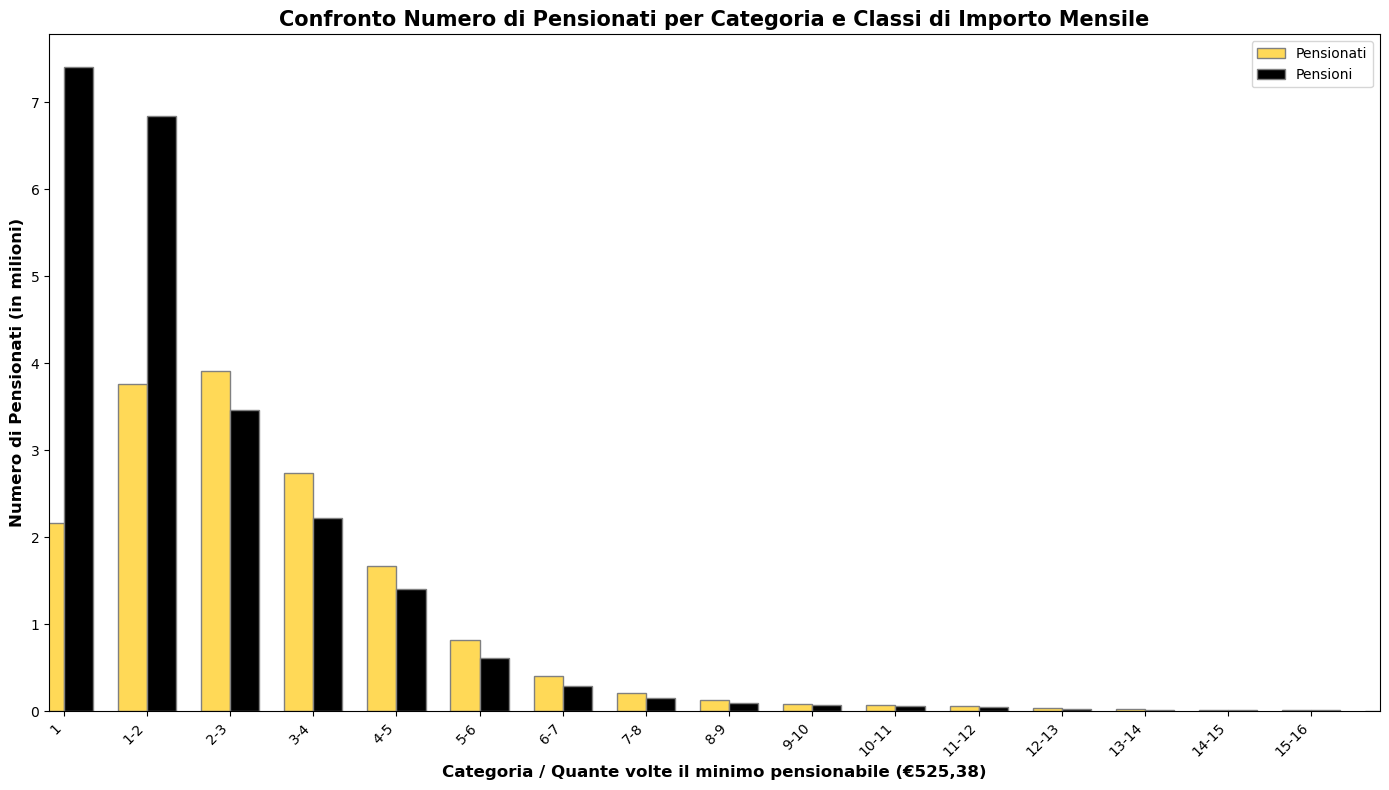

In [5]:
from matplotlib.pyplot import savefig
import matplotlib.pyplot as plt
import numpy as np

# Data (converted to millions)
categories = pensionati['Categoria'][:30]
pensionati_count = pensionati['Pensionati'][:30] / 1e6
pensioni_count = pensioni['Pensioni'][:30] / 1e6

# Bar width
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.figure(figsize=(14, 8))

# Create bars
plt.bar(r1, pensionati_count, color='#FFD957', width=bar_width, edgecolor='grey', label='Pensionati')
plt.bar(r2, pensioni_count, color='#000000', width=bar_width, edgecolor='grey', label='Pensioni')

# Add labels
plt.xlabel('Categoria / Quante volte il minimo pensionabile (€525,38)', fontsize=12, fontweight='bold')
plt.ylabel('Numero di Pensionati (in milioni)', fontsize=12, fontweight='bold')
plt.title('Confronto Numero di Pensionati per Categoria e Classi di Importo Mensile', fontsize=15, fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(categories))], categories, rotation=45, ha='right')

# Set x-axis limit
plt.xlim(0, 16)

# Add legend
plt.legend()

# Adjust layout
plt.tight_layout()
savefig('graphs/pensioni_e_pensionati_per_categoria.png')
# Show the plot
plt.show()

Smentiamo l'idea che la moda dei pensionati prenda la minima: bisogna distinguere tra pensioni e pensionati: questi ultimi possono avere più pensioni, e dunque non rientrare tra le fasce più deboli. 

# Rivalutazioni
## Scenario 2% di inflazione e 0% di crescita salari reali
**NOTA BENE:** il risparmio è calcolato rispetto alla baseline (Meloni 2023), ma è sottostimato perché esclude il fiscal drag annuale. Inoltre assumiamo che il numero di pensionati e la distribuzione delle pensioni rimanga costante.
Scenario base:

In [6]:
infl = 2
crescita = 0

In [7]:
rivalutazione_pensioni=riv.rivalutazione(pensioni, infl)
costo_rivalutazione_pensioni=rivalutazione_pensioni['Importo complessivo'].sum()-rivalutazione_pensioni['Importo rivalutato'].sum()
costo_per_pensionato = costo_rivalutazione_pensioni / 16131414
costo_per_pensione = costo_rivalutazione_pensioni / 22772004
#print('Rivalutazione - Importi pensioni singole')
#print('Scenario legge di bilancio')
#print('Import pensionati pensioni: ',rivalutazione_pensioni['Importo complessivo'].sum())
#print('Import pensionati rivalutazione pensioni: ',rivalutazione_pensioni['Importo rivalutato'].sum())
#print('Costo rivalutazione: ',costo_rivalutazione_pensioni)
#print('Costo rivalutazione per pensionato: ',costo_per_pensionato)
#print('Costo rivalutazione per pensione: ',costo_per_pensione)

**Importo totale pensioni (pensioni attuali)**: €322.233.068.108,00 \
**Importo totale pensioni (pensioni rivalutate)**: €327.739.326.538,04 \
**Costo della rivalutazione**: €5.506.258.430,04 \
**Costo della rivalutazione per pensionato**: €341,34 \
**Costo della rivalutazione per pensione**: €241,67 


Scenario rivalutazione in base al reddito pensionistico:

In [8]:
rivalutazione_pensionati = riv.rivalutazione(pensionati, infl)
costo_rivalutazione_pensionati_riv = rivalutazione_pensionati['Importo complessivo'].sum() - rivalutazione_pensionati['Importo rivalutato'].sum()
costo_per_pensionato_riv = costo_rivalutazione_pensionati_riv / 16131414
costo_per_pensione_riv = costo_rivalutazione_pensionati_riv / 22772004
risparmio = abs(costo_rivalutazione_pensioni - costo_rivalutazione_pensionati_riv)
risparmio5_1 = risparmio * 5
#print('Rivalutazione - Importi pensioni singole')
#print('Scenario rivalutazione in base al reddito pensionistico')
#print('Import pensionati pensioni: ', rivalutazione_pensionati['Importo complessivo'].sum())
#print('Import pensionati rivalutazione pensioni: ', rivalutazione_pensionati['Importo rivalutato'].sum())
#print('Costo rivalutazione: ', costo_rivalutazione_pensionati_riv)
#print('Costo rivalutazione per pensionato: ', costo_per_pensionato_riv)
#print('Costo rivalutazione per pensione: ', costo_per_pensione_riv)
#print(risparmio5)

**Importo totale pensionati (pensioni attuali)**: €322.233.068.115,00 \
**Importo totale pensionati (pensioni rivalutate)**: €327.462.949.712,48 \
**Costo totale della rivalutazione**: €5.229.881.597,48 \
**Costo medio della rivalutazione per pensionato**: €324,20 \
**Costo medio della rivalutazione per pensione**: €229,66 \
**Risparmio primo anno**: €276.376.832,57 \
**Risparmio 5 anni**: €1.381.884.162,84

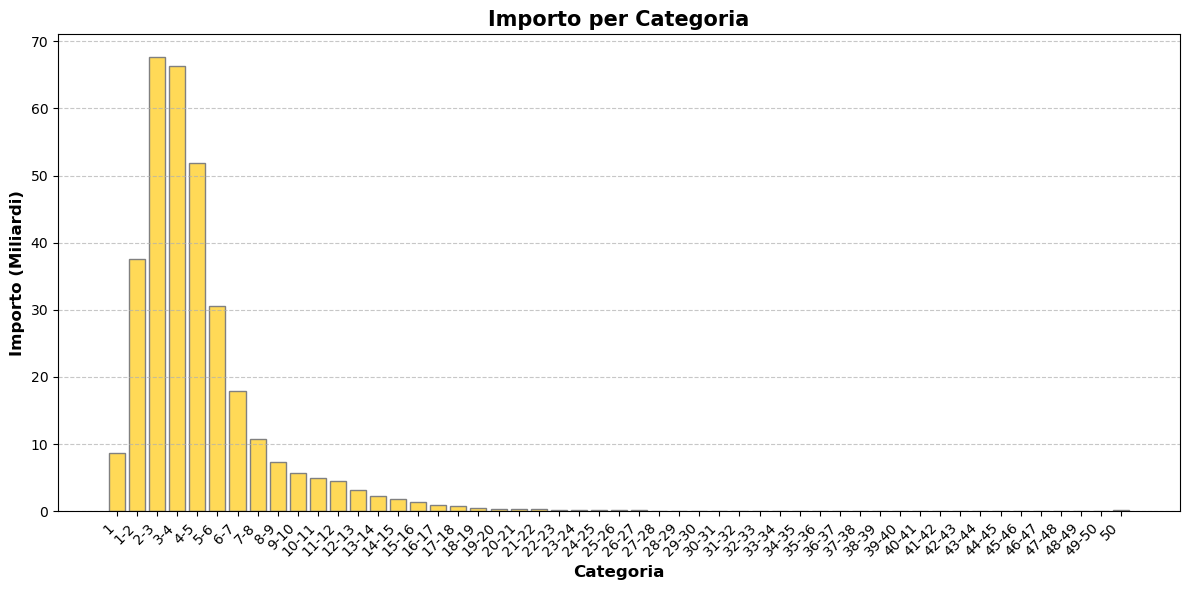

In [9]:
riv.plot_importo_per_categoria(rivalutazione_pensionati)

Scenario rivalutazione in base al reddito pensionistico UMB:

In [10]:
rivalutazione_pensionati_umb_conservativo = riv.rivalutazione_umb(pensionati, infl, crescita)
rivalutazione_pensionati_umb = riv.rivalutazione_umb(pensionati, infl, crescita, 0.65, 0.90)
costo_rivalutazione_pensionati_umb_conservativo = rivalutazione_pensionati_umb_conservativo['Importo complessivo'].sum() - rivalutazione_pensionati_umb_conservativo['Importo rivalutato'].sum()
costo_per_pensionato_umb_conservativo = costo_rivalutazione_pensionati_umb_conservativo / 16131414
costo_per_pensione_umb_conservativo = costo_rivalutazione_pensionati_umb_conservativo / 22772004

#print('Rivalutazione - Importi pensioni singole')
#print('Scenario rivalutazione in base al reddito pensionistico UMB conservativo')
#print('Import pensionati pensioni: ', rivalutazione_pensionati_umb_conservativo['Importo complessivo'].sum())
#print('Import pensionati rivalutazione pensioni: ', rivalutazione_pensionati_umb_conservativo['Importo rivalutato'].sum())
#print('Costo rivalutazione: ', costo_rivalutazione_pensionati_umb_conservativo)
#print('Costo rivalutazione per pensionato: ', costo_per_pensionato_umb_conservativo)
#print('Costo rivalutazione per pensione: ', costo_per_pensione_umb_conservativo)

costo_rivalutazione_pensionati_umb = rivalutazione_pensionati_umb['Importo complessivo'].sum() - rivalutazione_pensionati_umb['Importo rivalutato'].sum()
costo_per_pensionato_umb = costo_rivalutazione_pensionati_umb / 16131414
costo_per_pensione_umb = costo_rivalutazione_pensionati_umb / 22772004
risparmio = abs(costo_rivalutazione_pensioni - costo_rivalutazione_pensionati_umb)
risparmio5_2 = risparmio * 5
#print('Rivalutazione - Importi pensioni singole')
#print('Scenario rivalutazione in base al reddito pensionistico UMB')
#print('Import pensionati pensioni: ', rivalutazione_pensionati_umb['Importo complessivo'].sum())
#print('Import pensionati rivalutazione pensioni: ', rivalutazione_pensionati_umb['Importo rivalutato'].sum())
#print('Costo rivalutazione: ', costo_rivalutazione_pensionati_umb)
#print('Costo rivalutazione per pensionato: ', costo_per_pensionato_umb)
#print('Costo rivalutazione per pensione: ', costo_per_pensione_umb)
#print('Risparmio: ', risparmio)
#print(risparmio5


**Importo pensionati pensioni**: € 322.233.068.115,00 \
**Importo pensionati rivalutazione pensioni**: € 324.332.870.869,15     
**Costo rivalutazione**: €2.099.802.754,15 \
**Costo rivalutazione per pensionato**: €130,17 \
**Costo rivalutazione per pensione**: €92,21 \
**Risparmio rispetto a scenario base**: €3.406.455.675,89 \
**Risparmio 5 anni**: €17.032.278.379,48

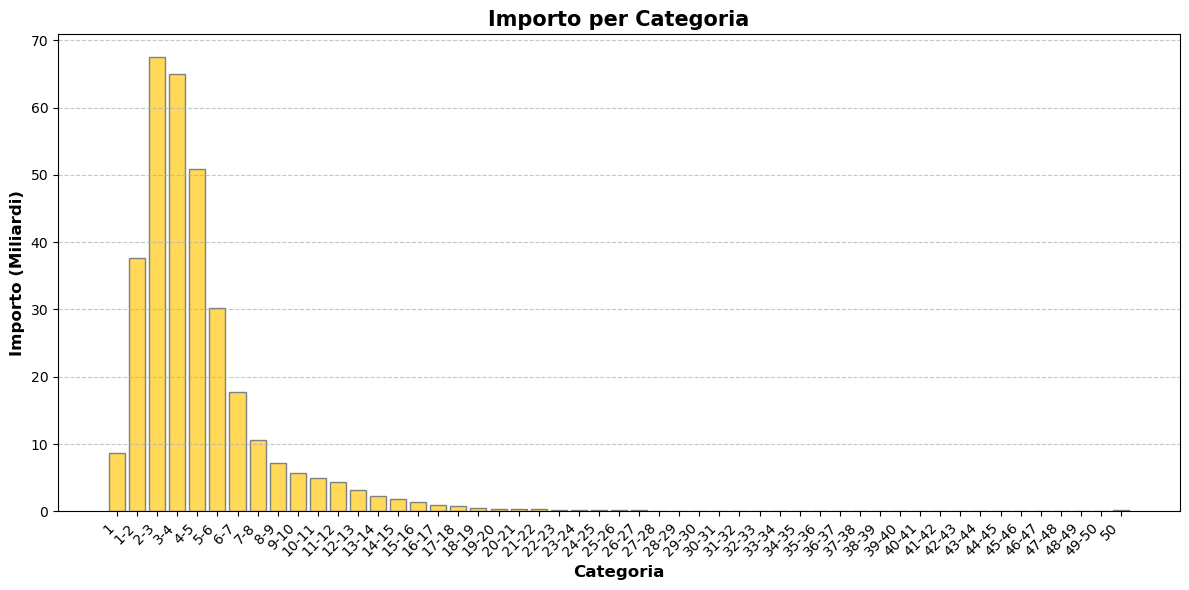

In [11]:
riv.plot_importo_per_categoria(rivalutazione_pensionati_umb_conservativo)

Scenario rivalutazione in base al reddito pensionistico FL:

In [12]:
rivalutazione_pensionati_fl = riv.rivalutazione_fl(pensionati, infl)
costo_rivalutazione_pensionati_fl = rivalutazione_pensionati_fl['Importo complessivo'].sum() - rivalutazione_pensionati_fl['Importo rivalutato'].sum()
costo_per_pensionato_fl = costo_rivalutazione_pensionati_fl / 16131414
costo_per_pensione_fl = costo_rivalutazione_pensionati_fl / 22772004
risparmio = abs(costo_rivalutazione_pensioni - costo_rivalutazione_pensionati_fl)
risparmio5_3 = risparmio * 5
#print('Rivalutazione - Importi pensioni singole')
#print('Scenario rivalutazione in base al reddito pensionistico FL')
#print('Import pensionati pensioni: ', rivalutazione_pensionati_fl['Importo complessivo'].sum())
#print('Import pensionati rivalutazione pensioni: ', rivalutazione_pensionati_fl['Importo rivalutato'].sum())
#print('Costo rivalutazione: ', costo_rivalutazione_pensionati_fl)
#print('Costo rivalutazione per pensionato: ', costo_per_pensionato_fl)
#print('Costo rivalutazione per pensione: ', costo_per_pensione_fl)
#print('Risparmio: ', risparmio)
#print(risparmio5)

**Importo pensionati pensioni**: €322.233.068.115,00 \
**Importo pensionati rivalutazione pensioni**: €325.115.771.309,79 \   
**Costo rivalutazione**: €2.882.703.194.79 \
**Costo rivalutazione per pensionato**: €178,70 \
**Costo rivalutazione per pensione**: €126,58 \
**Risparmio rispetto a scenario base**: €2.623.555.235,25 \
**Risparmio 5 anni**: €13.117.776.176,27

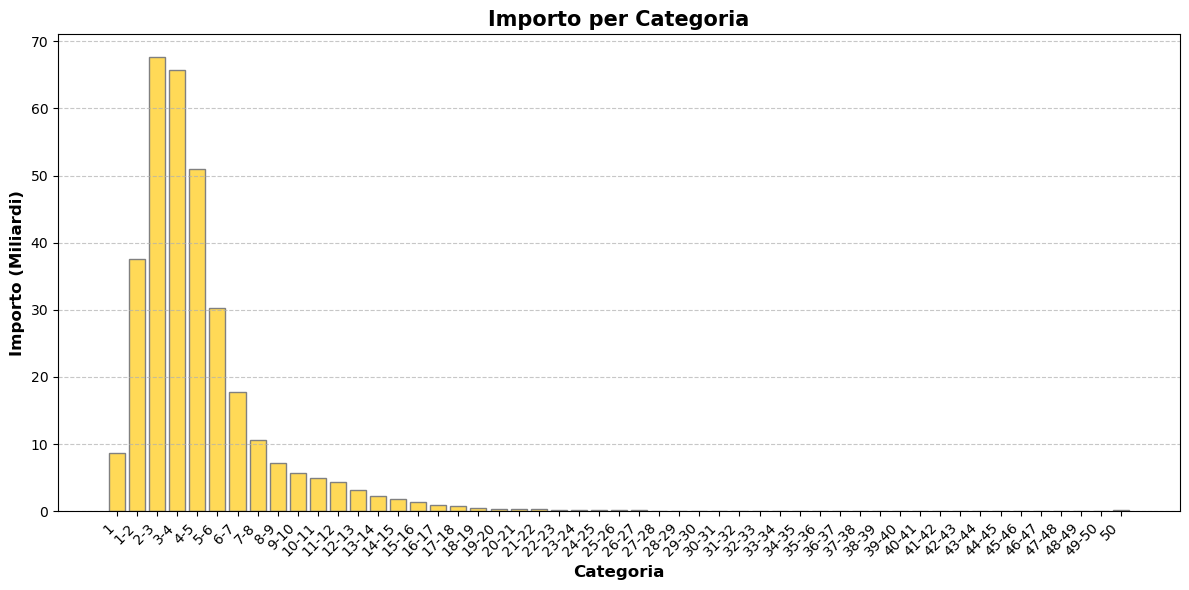

In [13]:
riv.plot_importo_per_categoria(rivalutazione_pensionati_fl)

Scenario rivalutazione in base al reddito pensionistico KD (Modificata):

In [14]:
rivalutazione_pensionati_kd = riv.rivalutazione_nl(pensionati, infl)
costo_rivalutazione_pensionati_kd = rivalutazione_pensionati_kd['Importo complessivo'].sum() - rivalutazione_pensionati_kd['Importo rivalutato'].sum()
costo_per_pensionato_kd = costo_rivalutazione_pensionati_kd / 16131414
costo_per_pensione_kd = costo_rivalutazione_pensionati_kd / 22772004
risparmio = abs(costo_rivalutazione_pensioni - costo_rivalutazione_pensionati_kd)
risparmio5_4 = risparmio * 5
#print('Rivalutazione - Importi pensioni singole')
#print('Scenario rivalutazione in base al reddito pensionistico KD')
#print('Import pensionati pensioni: ', rivalutazione_pensionati_kd['Importo complessivo'].sum())
#print('Import pensionati rivalutazione pensioni: ', rivalutazione_pensionati_kd['Importo rivalutato'].sum())
#print('Costo rivalutazione: ', costo_rivalutazione_pensionati_kd)
#print('Costo rivalutazione per pensionato: ', costo_per_pensionato_kd)
#print('Costo rivalutazione per pensione: ', costo_per_pensione_kd)
#print('Risparmio: ', risparmio)
#print(risparmio5)

**Importo pensionati pensioni**: €322.233.068.115,00 \
**Importo pensionati rivalutazione pensioni**: €325.947.546.439,42 \   
**Costo rivalutazione**: €3.714.478.324,42 \
**Costo rivalutazione per pensionato**: €230,26 \
**Costo rivalutazione per pensione**: €163,11 \
**Risparmio rispetto a scenario base**: €1.791.780.105,62 \
**Risparmio 5 anni**: €8.958.900.528,10

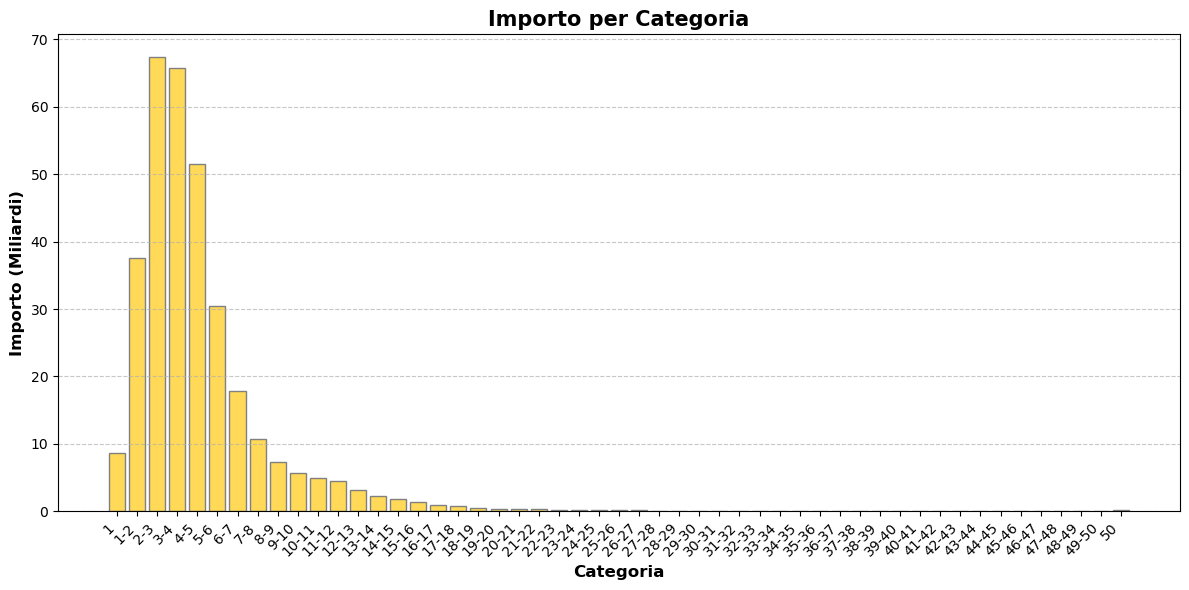

In [15]:
riv.plot_importo_per_categoria(rivalutazione_pensionati_kd)

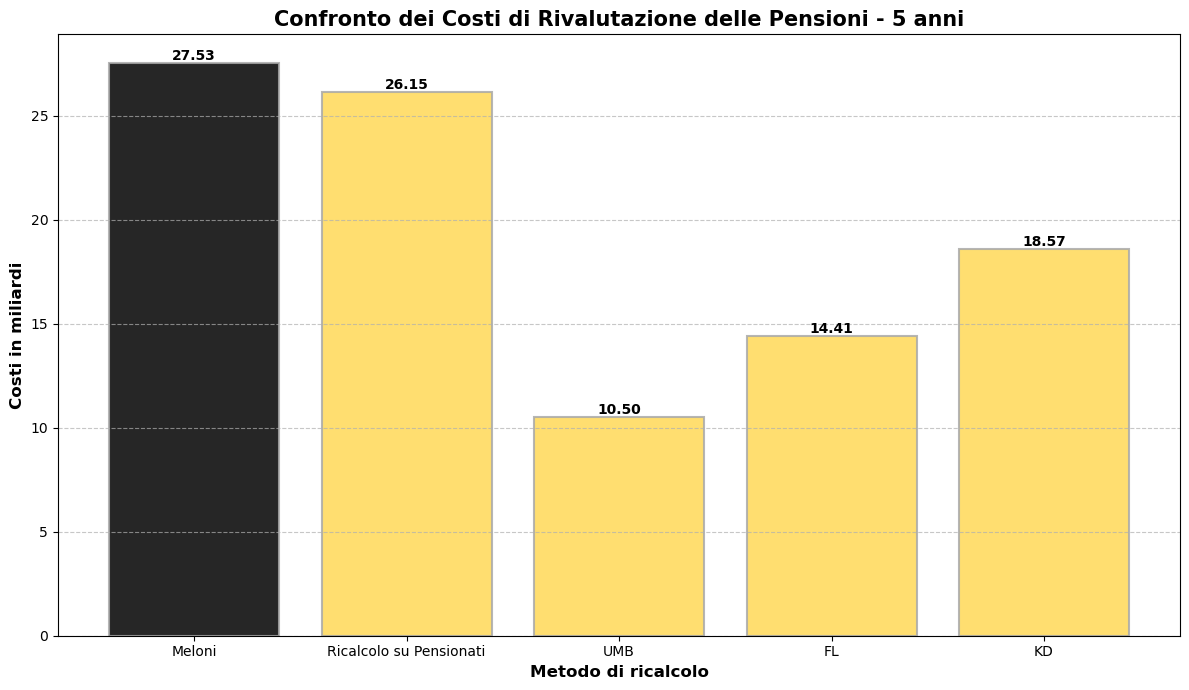

In [16]:
# I dati dei costi
costi = np.array([costo_rivalutazione_pensioni, costo_rivalutazione_pensionati_riv,
                  costo_rivalutazione_pensionati_umb_conservativo, costo_rivalutazione_pensionati_fl,
                  costo_rivalutazione_pensionati_kd]) * 5
costi = abs(costi)

# I nomi dei metodi
metodi = ['Meloni', 'Ricalcolo su Pensionati', 'UMB', 'FL', 'KD']

# Crea il grafico
fig, ax = plt.subplots(figsize=(12, 7))

# Aggiungi un grafico a barre con i colori richiesti
bars = ax.bar(metodi, costi/10**9, color=['#000000'] + ['#FFD957']*4, 
              edgecolor='darkgray', 
              linewidth=1.5, 
              alpha=0.85)

# Aggiungi i valori sopra le barre
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', 
            ha='center', va='bottom', 
            fontweight='bold')

# Personalizza l'aspetto
ax.set_xlabel('Metodo di ricalcolo', fontsize=12, fontweight='bold')
ax.set_ylabel('Costi in miliardi', fontsize=12, fontweight='bold')
ax.set_title('Confronto dei Costi di Rivalutazione delle Pensioni - 5 anni', fontsize=15, fontweight='bold')

# Rimuovi la notazione scientifica
ax.ticklabel_format(style='plain', axis='y')

# Aggiungi una griglia leggera
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Regola il layout
plt.tight_layout()
savefig('graphs/costi_per_metodo_rivalutazione.png')
# Mostra il grafico
plt.show()

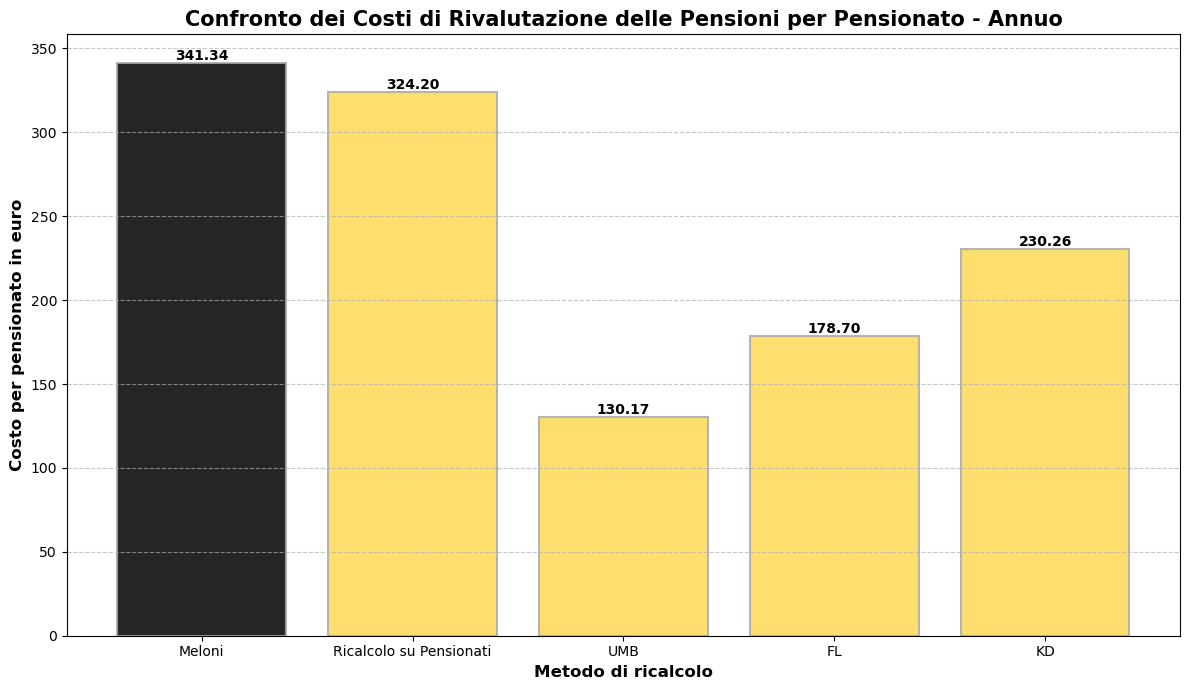

In [17]:
# I dati dei costi per pensionato
costi_per_pensionato = abs(np.array([costo_per_pensionato, costo_per_pensionato_riv,
                                 costo_per_pensionato_umb_conservativo, costo_per_pensionato_fl,
                                 costo_per_pensionato_kd]))

# I nomi dei metodi
metodi = ['Meloni', 'Ricalcolo su Pensionati', 'UMB', 'FL', 'KD']

# Crea il grafico
fig, ax = plt.subplots(figsize=(12, 7))

# Aggiungi un grafico a barre con i colori richiesti
bars = ax.bar(metodi, costi_per_pensionato, color=['#000000'] + ['#FFD957']*4,
              edgecolor='darkgray',
              linewidth=1.5,
              alpha=0.85)

# Aggiungi i valori sopra le barre
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom',
            fontweight='bold')

# Personalizza l'aspetto
ax.set_xlabel('Metodo di ricalcolo', fontsize=12, fontweight='bold')
ax.set_ylabel('Costo per pensionato in euro', fontsize=12, fontweight='bold')
ax.set_title('Confronto dei Costi di Rivalutazione delle Pensioni per Pensionato - Annuo', fontsize=15, fontweight='bold')

# Rimuovi la notazione scientifica
ax.ticklabel_format(style='plain', axis='y')

# Aggiungi una griglia leggera
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Regola il layout
plt.tight_layout()
savefig('graphs/costi_per_pensionato_per_metodo_rivalutazione.png')
# Mostra il grafico
plt.show()

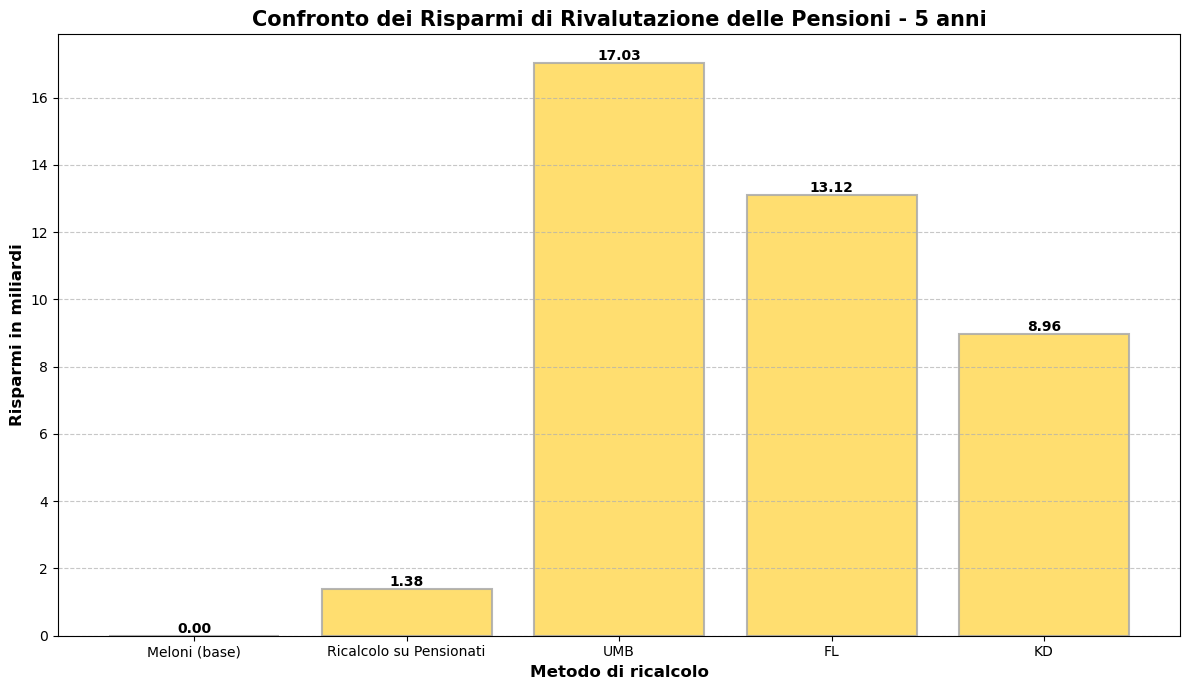

In [18]:
# I dati dei risparmi
risparmi = np.array([0, risparmio5_1, risparmio5_2, risparmio5_3, risparmio5_4]) / 10**9

# I nomi dei metodi
metodi = ['Meloni (base)', 'Ricalcolo su Pensionati', 'UMB', 'FL', 'KD']

# Crea il grafico
fig, ax = plt.subplots(figsize=(12, 7))

# Aggiungi un grafico a barre con i colori richiesti
bars = ax.bar(metodi, risparmi, color=['#000000'] + ['#FFD957']*4,
              edgecolor='darkgray',
              linewidth=1.5,
              alpha=0.85)

# Aggiungi i valori sopra le barre
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom',
            fontweight='bold')

# Personalizza l'aspetto
ax.set_xlabel('Metodo di ricalcolo', fontsize=12, fontweight='bold')
ax.set_ylabel('Risparmi in miliardi', fontsize=12, fontweight='bold')
ax.set_title('Confronto dei Risparmi di Rivalutazione delle Pensioni - 5 anni', fontsize=15, fontweight='bold')

# Rimuovi la notazione scientifica
ax.ticklabel_format(style='plain', axis='y')

# Aggiungi una griglia leggera
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Regola il layout
plt.tight_layout()
savefig('graphs/risparmi_per_metodo_rivalutazione.png')
# Mostra il grafico
plt.show()